<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Contribution-Functions" data-toc-modified-id="Contribution-Functions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Contribution Functions</a></span><ul class="toc-item"><li><span><a href="#Initial-Model-Setup" data-toc-modified-id="Initial-Model-Setup-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Initial Model Setup</a></span></li><li><span><a href="#Molecular-contribution-function" data-toc-modified-id="Molecular-contribution-function-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Molecular contribution function</a></span></li><li><span><a href="#Transmission-Contribution-Function" data-toc-modified-id="Transmission-Contribution-Function-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Transmission Contribution Function</a></span></li><li><span><a href="#Thermal-Contribution-Function" data-toc-modified-id="Thermal-Contribution-Function-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Thermal Contribution Function</a></span></li></ul></li></ul></div>

# Contribution Functions

Contribution functions are helpful to understand either 1) what molecules are contributing to the overall resultant spectrum, or 2) at what pressure levels you are sensitive to in thermal emission

In this tutorial you will learn how to get molecular contribution plots and thermal contribution heatmaps

In [1]:
import picaso.justdoit as jdi
import picaso.justplotit as jpi
jpi.output_notebook()

Loading BokehJS ...

In [2]:
sonora_profile_db = '/Users/nbatalh1/Documents/data/sonora_profile/'

## Initial Model Setup

Let's do a basic run with a thermal emission and transmission spectrum

In [12]:
opa=jdi.opannection()
case1 = jdi.inputs()
case1.star(opa, 5000,0,4.0,radius=1, radius_unit=jdi.u.Unit('R_sun'))
case1.gravity(radius = 1, radius_unit=jdi.u.Unit('R_jup'),
           mass = 1, mass_unit=jdi.u.Unit('M_jup'))
case1.phase_angle(0)
case1.sonora(sonora_profile_db, 400)
df = case1.spectrum(opa, calculation='thermal+transmission', full_output=True)

/Users/nbatalh1/Documents/codes/PICASO/picaso/picaso/atmsetup.py:190: UserWarning: Ignoring graphite in input file, not a recognized molecule
  warnings.warn("Ignoring %s in input file, not a recognized molecule" % i, UserWarning)


## Molecular contribution function

What does get contribution output?? 

`taus_per_layer`
- Each dictionary entry is a nlayer x nwave that represents the per layer optical depth for that molecule. 

`cumsum_taus`
- Each dictionary entry is a nlevel x nwave that represents the cumulative summed opacity for that molecule. 

`tau_p_surface` 
- Each dictionary entry is a nwave array that represents the pressure level where the cumulative opacity reaches the value specified by the user through `at_tau`.

Note: If you do not see a molecule that you have added as input, check to make sure it is propertly formatted (e.g. Sodium must be Na not NA, Titanium Oxide must be TiO not TIO)

In [13]:
out = jdi.get_contribution(case1, opa, at_tau=1)

In [14]:
out.keys()

dict_keys(['taus_per_layer', 'cumsum_taus', 'tau_p_surface'])

In [15]:
jpi.show(jpi.molecule_contribution(out, opa, plot_width=700, x_axis_type='log'))

In [16]:
out['taus_per_layer']['H2O'].shape

(90, 58228)

## Transmission Contribution Function 

In [21]:
jdi.np.max(CF)

4406814256.129644

## Thermal Contribution Function

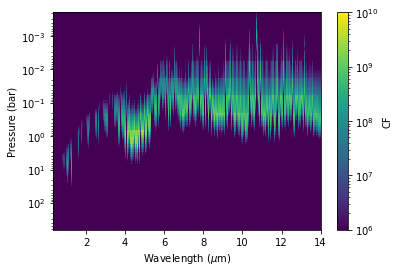

In [22]:
fig, ax, CF = jpi.thermal_contribution(df['full_output'], 
                                       norm=jpi.colors.LogNorm(vmin=1e6, vmax=1e10))